## IN LAB ASSIGNMENT I
### Bastian Lang

1) Perceptron class. With some inspiration and correction taken from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb


In [5]:
import numpy as np;
%matplotlib inline
from matplotlib import pyplot as plt
## Class representing a perceptron
class Perceptron:

    # Constructor
    # eta: Learning rate
    # n_iter: number of iterations when fitting the data
    def __init__(self, eta, n_iter):
        self._eta = eta;
        self._n_iter = n_iter;
        
        
    # Function to adapt the weights of the perceptron to a given set of training data.
    # training_data: Data to be fitted
    # labels: labels for the given training data
    def fit(self, training_data, labels):
        # check inputs
        if(training_data.shape[0] != labels.size):
            print('data and label size does not fit')
        
        number_of_training_examples = training_data.shape[0]
        number_of_parameters = training_data.shape[1]
        # initialize weights - add bias weight in the beginning
        self._weights = np.array(np.random.rand(number_of_parameters+1))
        self._errors = []
        # start training
        for i in range(self._n_iter):
            errors = 0
            for training_example, training_label in zip(training_data, labels):
                # calculate activation
                activation = self.predict(training_example)

                # calculate error
                error = training_label - activation
                errors += int(error != 0.0)
                #print(error)

                # add bias to training example to be able to adapt its weight correctly
                training_example =np.concatenate((np.array([1]),training_example),axis=0)

                # adapt weights
                update = error * self._eta
                self._weights = self._weights + update * training_example
                #print('weights:', self._weights)
            self._errors.append(errors)
    
    # Given some input computes the output of the perceptron
    def predict(self, net_input):
        # add bias to input
        net_input = np.concatenate((np.array([1]),net_input),axis=0)
        
        activation = np.dot(net_input, self._weights)
        result = self.activate(activation);
        return result;
    
    # Activation function of the perceptron (simple step function in default case)
    def activate(self, activation):
        if(activation < 0):
            return -1
        return 1;


2) Application of class to zoo.data from https://archive.ics.uci.edu/ml/datasets/Zoo

The figure below shows the classification error over time during learning of predicting type 1 animals.

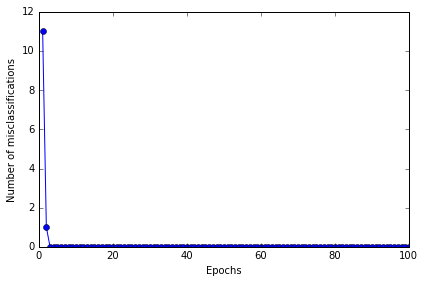

In [6]:
data = np.genfromtxt('zoo.data', delimiter=',')
training_data = data[:,1:data.shape[1]-1]
labels = data[:,-1]
y = np.where(labels == 1, 1, -1)
#print(labels)
#print(y)
eta = 0.1
n_iter = 100
perceptron = Perceptron(eta, n_iter)
perceptron.fit(training_data, y)

plt.plot(range(1, len(perceptron._errors) + 1), perceptron._errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()
#print(perceptron._errors)
#print(training_data.shape)

3) Application to iris dataset as has been done in https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb, only this time with the definition of a Perceptron above.

In [8]:
import sklearn
from sklearn.datasets import load_iris
import pandas as pd

#df = sklearn.datasets.load_iris()
df = pd.read_csv('iris.data', header=None)
df.tail()
#print(df)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


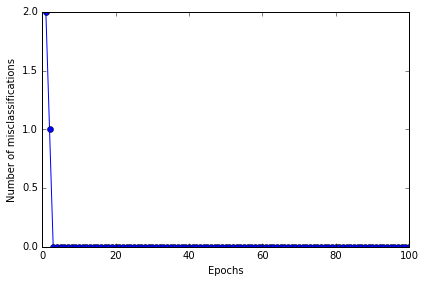

In [9]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron(eta, n_iter)
ppn.fit(X,y)

plt.plot(range(1, len(ppn._errors) + 1), ppn._errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()
